## Install HAZM Library

In [ ]:
!pip install hazm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 371.7/371.7 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 52.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 27.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 55.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.7/227.7 kB 17.4 MB/s eta 0:00:00
  Created wheel for flashtext: filename=flashtext-2.7-py2.py3-none-any.whl size=9296 sha256=597a19d9e5529fcc1e8fecf2e4a25f1f1d5e692226d40a5568558a74bbbe48c4
  Stored in directory: /root/.cache/pip/wheels/bc/be/39/c37ad168eb2ff644c9685f52554440372129450f0b8ed203dd
Successfully built flashtext
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This

## Import Essential Library

In [ ]:
import numpy as np
import pandas as pd

## Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Unzip Dataset

In [ ]:
!unzip -xq '/content/drive/MyDrive/Colab Notebooks/Hekaton/News_Classification/data.zip'

## Read Train set

In [ ]:
train = pd.read_csv('train_data.csv')
train.head()

,title,description,tags
0,روایتی از تحصیل زیرسقف‌های لرزان و سرمای سوزان...,گروه استان‌ها- دانش‌آموزان مدرسه روستای کَهنان...,استانها
1,انقلابی سرشناس بحرین در گفت‌وگو با تسنیم: مردم...,گروه استان‌ها ــ انقلابی سرشناس بحرین با بیان ...,استانها
2,‌زندگی مردم در شهر قم ‌جریان دارد / پیشگیری در...,گروه استان‌ها ــ با اعلام شیوع ویروس کرونا در ...,استانها
3,واکنش &quot;پروفسور کرمی&quot; به دروغ‌پراکنی ...,یک متخصص بیوتکنولوژی پزشکی با بیان اینکه مرگ‌و...,اجتماعی
4,مردم نگران تأمین کالاهای موردنیاز خود نباشند/ ...,رئیس اتحادیه فروشگاه‌های زنجیره‌ای با اشاره به...,اقتصادی


In [ ]:
train.shape

(12457, 3)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12457 entries, 0 to 12456
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        12457 non-null  object
 1   description  12457 non-null  object
 2   tags         12455 non-null  object
dtypes: object(3)
memory usage: 292.1+ KB


In [ ]:
train['tags'].astype('str')

0        استانها
1        استانها
2        استانها
3        اجتماعی
4        اقتصادی
          ...   
12452      سیاسی
12453      سیاسی
12454    بایگانی
12455    بایگانی
12456    بایگانی
Name: tags, Length: 12457, dtype: object

In [ ]:
train['tags'].unique()

array(['استانها', 'اجتماعی', 'اقتصادی', 'سیاسی', 'فرهنگی', 'بین الملل',
       'ورزشی', 'رسانه ها', 'بازار', 'الشرق الأوسط', 'دانش و محیط زیست',
       'جهان', 'ایران', 'NRS-Import', 'فرهنگ و هنر', 'آلمان', 'دیدگاه',
       'دوره\u200cهای زبان آلمانی', 'ورزش', 'اقتصاد', 'گوناگون',
       'شبکه\u200cهای اجتماعی', 'دویچه وله', 'Community D',
       'آلمانی پیش\u200cرفته', 'ویدئو > گزارش', 'استان ها > مرکزی',
       'استان ها > قم', 'علمی و دانشگاهی > صنفی، فرهنگی',
       'اقتصادی > عمران و اشتغال', 'اقتصادی > تولید و تجارت',
       'اجتماعی > سلامت', 'اجتماعی > آموزش و پرورش', 'سیاسی > دولت',
       'فرهنگی و هنری > گردشگری و میراث', 'اقتصادی > اقتصاد کلان',
       'ورزشی > فوتبال، فوتسال', 'سیاسی > سیاست خارجی',
       'اجتماعی > حوادث، انتظامی', 'سیاسی > مجلس', 'اجتماعی > محیط زیست',
       'سیاسی > اندیشه امام و رهبری', 'اجتماعی > خانواده',
       'سیاسی > حقوقی و قضایی', 'سیاسی > سیاست داخلی',
       'استان ها > لرستان', 'علمی و دانشگاهی > علم و فناوری ایران',
       'استان ها > گیل

In [ ]:
train.isnull().sum()

title          0
description    0
tags           2
dtype: int64

In [ ]:
train[train['tags'].isnull()]

,title,description,tags
11659,مجید آذرپی به زندان اوین بازگشت,مجید آذرپی، زندانی سیاسی اصلاح‌طلب و عضو ستاد ...,NaN
12186,مقام آموزش و پرورش: الزام دانش آموزان به پوشش ...,مدیرکل انجمن اولیا و مربیان وزارت آموزش و پرور...,NaN


In [ ]:
train.loc[11659, 'tags'] = 'سیاسی'
train.loc[12186, 'tags'] = 'اجتماعی'

In [ ]:
train[train['tags'] == 'بایگانی']

,title,description,tags
9763,شرکت هواپیمایی ترکیه پروازهایش به چهار شهر ایر...,در پی شیوع ویروس کرونا در ایران شرکت هواپیمایی...,بایگانی
9764,ادامه کشمکش لفظی بین وزارت بهداشت و نماینده مج...,کشمکش لفظی بین معاون وزارت بهداشت و نماینده قم...,بایگانی
9766,شمخانی نماینده قم را به دلیل سخنانش درباره کرو...,علی شمخانی، دبیر شورای عالی امنیت ملی ایران، خ...,بایگانی
9767,وزیر دادگستری مامور پیگیری اتهامات نیلوفر بیان...,علیرضا آوایی، وزیر دادگستری ایران، از سوی هیئت...,بایگانی
9768,دادگاه جدید پرونده ۱۶ هزار میلیارد تومانی گروه...,رسیدگی به پرونده ١۶ هزار میلیارد تومانی عباس ا...,بایگانی
...,...,...,...
12450,جدایی‌طلبان یمن از طرح خودمختاری عقب‌نشینی کردند,سه ماه بعد از اعلام خودمختاری جدایی‌طلبان یمن،...,بایگانی
12451,«بازداشت ۴۰ نفر» در ارتباط با آتش‌سوزی جنگل‌ها...,فرمانده یگان حفاظت سازمان جنگل‌ها، مراتع و آبخ...,بایگانی
12454,روسیه: ابراز نگرانی لاوروف و ظریف درباره حضور ...,وزارت خارجه روسیه اعلام کرد که سرگئی لاوروف و...,بایگانی
12455,وزیر خارجه ایران وارد بیروت شد,در حالی که اعتراضات مردمی در لبنان در پی انفجا...,بایگانی


In [ ]:
train['tags'].value_counts().iloc[:10]

بایگانی                1944
جهان                   1658
ایران                  1188
بین الملل               972
سیاسی                   922
سیاسی > دولت            506
اجتماعی                 494
اقتصادی                 478
استانها                 433
سیاسی > سیاست خارجی     418
Name: tags, dtype: int64

In [ ]:
train['tags'].value_counts().iloc[10:20]

اجتماعی > سلامت           407
آلمان                     310
سیاسی > مجلس              266
سیاسی > سیاست داخلی       261
دانش و محیط زیست          203
سیاسی > حقوقی و قضایی     166
اقتصاد                    133
فرهنگی                    126
سیاسی > دفاعی - امنيتی    110
اقتصادی > اقتصاد کلان     108
Name: tags, dtype: int64

In [ ]:
train['tags'].value_counts().iloc[20:30]

اجتماعی > حوادث، انتظامی           79
فرهنگ و هنر                        75
ورزشی > فوتبال، فوتسال             68
علمی و دانشگاهی > آموزش            67
اقتصادی > تولید و تجارت            63
اجتماعی > جامعه، شهری              61
اقتصادی > عمران و اشتغال           49
بین الملل > آسیا،خاورمیانه         47
اجتماعی > آموزش و پرورش            46
فرهنگی و هنری > گردشگری و میراث    42
Name: tags, dtype: int64

In [ ]:
train['tags'].value_counts().iloc[30:40]

علمی و دانشگاهی > علم و فناوری ایران    38
اقتصادی > انرژی                         37
اجتماعی > محیط زیست                     37
سیاسی > انرژی هسته‎‌ای                  35
اجتماعی > خانواده                       35
سیاسی > اندیشه امام و رهبری             34
ورزش                                    33
اقتصاد ایران                            32
دیدگاه                                  31
بین الملل > فرامنطقه ای                 24
Name: tags, dtype: int64

In [ ]:
train['tags'].value_counts().iloc[40:50]

علمی و دانشگاهی > علم و فناوری جهان    23
ورزشی                                  22
خبرخوان                                20
ايران                                  20
استان ها > کهگیلویه و بویراحمد         18
فرهنگی و هنری > سینما و تئاتر          17
فرهنگی و هنری > تجسمی و موسیقی         17
استان ها > خوزستان                     16
اقتصادی > ارتباطات و فناوری اطلاعات    15
NRS-Import                             14
Name: tags, dtype: int64

In [ ]:
train['tags'].value_counts().iloc[50:60]

فرهنگی و هنری > رسانه           12
استان ها > مازندران             12
استان ها > تهران                12
استان ها > هرمزگان              11
فرهنگی و هنری > دین و اندیشه    10
استان ها > گیلان                 9
ورزشی > جهان ورزش                9
استان ها > کرمانشاه              9
ورزشی > سایر ورزش‌ها             9
استان ها > اصفهان                9
Name: tags, dtype: int64

In [ ]:
train['tags'].value_counts().iloc[60:70]

عکس > خبری                         8
علمی و دانشگاهی > پژوهش            8
استان ها > مرکزی                   8
علمی و دانشگاهی > صنفی، فرهنگی     7
استان ها > خراسان رضوی             7
رسانه ها                           7
فرهنگی و هنری > ادبیات و کتاب      7
علمی و دانشگاهی > جهاد دانشگاهی    6
دانش و فناوری                      6
استان ها > قم                      5
Name: tags, dtype: int64

In [ ]:
train['tags'].value_counts().iloc[70:80]

گرافیک > اینفوگرافیک             5
فرهنگی و هنری > فرهنگ حماسه      5
استان ها > لرستان                4
ورزشی > کشتی، رزمی               4
استان ها > بوشهر                 4
استان ها > سیستان و بلوچستان     4
استان ها > چهارمحال و بختیاری    3
استان ها > سمنان                 3
ورزشی > ورزش بانوان              3
ایسنا+ > ایسنا+                  3
Name: tags, dtype: int64

In [ ]:
train['tags'].value_counts().iloc[80:]

استان ها > گلستان          3
استان ها > البرز           3
استان ها > کرمان           3
استان ها > زنجان           3
استان ها > خراسان جنوبی    2
گوناگون                    2
دوره‌های زبان آلمانی       1
استان ها > فارس            1
بازار                      1
الشرق الأوسط               1
شبکه‌های اجتماعی           1
بین الملل > فلسطین         1
استان ها > اردبیل          1
استان ها > یزد             1
استان ها > ایلام           1
Community D                1
آلمانی پیش‌رفته            1
ورزشی > توپ و تور          1
ویدئو > گزارش              1
دویچه وله                  1
Name: tags, dtype: int64

### Change Tags Into Desired Tags

In [ ]:
news_tags = ['اجتماعی', 'اقتصادی', 'ایران_استانها', 'بین الملل', 'سیاسی', 'علمی_فرهنگی_ورزشی']

def change_tags(x):
  if x in news_tags:
    return x
  else:
    if x.find('اجتماعی') != -1:
      x = 'اجتماعی'
    elif x.find('اقتصادی') != -1:
      x = 'اقتصادی'
    elif x.find('اقتصاد') != -1:
      x = 'اقتصادی'
    elif x.find('ايران') != -1:
      x = 'ایران_استانها'
    elif x.find('استان ها') != -1:
      x = 'ایران_استانها'
    elif x.find('استانها') != -1:
      x = 'ایران_استانها'
    elif x.find('بین الملل') != -1:
      x = 'بین الملل'
    elif x.find('سیاسی') != -1:
      x = 'سیاسی'
    elif x.find('علمی') != -1:
      x = 'علمی_فرهنگی_ورزشی'
    elif x.find('فرهنگی') != -1:
      x = 'علمی_فرهنگی_ورزشی'
    elif x.find('ورزش') != -1:
      x = 'علمی_فرهنگی_ورزشی'
    elif x.find('ورزشی') != -1:
      x = 'علمی_فرهنگی_ورزشی'
    elif x.find('هنر') != -1:
      x = 'علمی_فرهنگی_ورزشی'
    return x

In [ ]:
train['tags'] = train['tags'].apply(change_tags)

In [ ]:
train['tags'].unique()

array(['ایران_استانها', 'اجتماعی', 'اقتصادی', 'سیاسی',
       'علمی_فرهنگی_ورزشی', 'بین الملل', 'رسانه ها', 'بازار',
       'الشرق الأوسط', 'دانش و محیط زیست', 'جهان', 'ایران', 'NRS-Import',
       'آلمان', 'دیدگاه', 'دوره\u200cهای زبان آلمانی', 'گوناگون',
       'دویچه وله', 'Community D', 'آلمانی پیش\u200cرفته',
       'ویدئو > گزارش', 'گرافیک > اینفوگرافیک', 'ایسنا+ > ایسنا+',
       'عکس > خبری', 'بایگانی', 'خبرخوان', 'دانش و فناوری'], dtype=object)

In [ ]:
train['tags'].value_counts()

سیاسی                   2718
بایگانی                 1944
جهان                    1658
ایران                   1188
اجتماعی                 1160
بین الملل               1044
اقتصادی                  915
علمی_فرهنگی_ورزشی        609
ایران_استانها            605
آلمان                    310
دانش و محیط زیست         203
دیدگاه                    31
خبرخوان                   20
NRS-Import                14
عکس > خبری                 8
رسانه ها                   7
دانش و فناوری              6
گرافیک > اینفوگرافیک       5
ایسنا+ > ایسنا+            3
گوناگون                    2
دویچه وله                  1
الشرق الأوسط               1
آلمانی پیش‌رفته            1
ویدئو > گزارش              1
دوره‌های زبان آلمانی       1
بازار                      1
Community D                1
Name: tags, dtype: int64

In [ ]:
train[train['tags'] == 'آلمان']['description']

3045    با تصویب وزیران بهداشت ایالتی از این پس تمام م...
3046    آلمان برای مقابله با گسترش ویروس کرونا در این ...
3050    نخستین نتایج تحقیقات درگیری‌های خیابانی بی‌ساب...
3054    دادگاهی در آخن برای رسیدگی به اتهام کلاهبرداری...
3066    برخی ویروس‌شناسان آلمان بر این باورند که در دو...
                              ...                        
6411    یک پنجم رای‌دهندگان آلمانی اعتقاد دارند که متو...
6420    ۴۷ کودک و نوجوان بی​‌سرپرست که در اردوگاه‌های ...
6422    پس از ورود غیرمنتظره پناهجویان به آلمان در سال...
6428    ۸ ماه مه ۱۹۴۵، میلیون ها کشته و یک قاره ویرانه...
6429    ۸ ماه مه ۱۹۴۵، میلیون ها کشته و یک قاره ویرانه...
Name: description, Length: 310, dtype: object

In [ ]:
train[train['tags'] == 'خبرخوان']['description']

10284    سخنگوی وزارت بهداشت ایران از افزایش تعداد قربا...
10514    سخنگوی شورای نگهبان می‌گوید «عدم تأیید صلاحیت ...
10832    یک عضو شورای شهر همدان می‌گوید با افزایش «شش ب...
10839    خبرگزاری ایسنا از افزایش ۱۵.۵ میلیون تومانی قی...
10840    باشگاه خبرنگاران جوان به نقل از برخی استفاده‌ک...
10858    یک مقام اتاق اصناف ایران، خسارت ماهیانه تعطیلا...
10860    معاون سیاسی-امنیتی استاندار یزد با تایید شلیک ...
10872    فریدون همتی، استاندار هرمزگان با ابراز نگرانی ...
10887    احمد یوسفی، معاون پلیس کرمان گفته است زنی که ب...
11112    همزمان با رزمایش دریایی پکن در دریای جنوبی چین...
11653    رئیس مرکز فوریت‌های پزشکی استان البرز از مرگ د...
11661    امیر حاتمی، وزیر دفاع ایران می‌گوید با برداشته...
11663    رئیس کل سازمان نظام پزشکی ایران از تغییر ناگها...
12054    کانادا پنجشنبه از طرح آمریکا برای استقرار نیرو...
12130    سران کشورهای عضو گروه ۲۰ روز پنجشنبه وعده دادن...
12137    گازگرفتگی در یک معدن در گیلانغرب، یک کشته و شش...
12140     گزارش ها حاکی است که تست کرونای احسان حدادی٬ .

In [ ]:
train.loc[train['tags'] == 'آلمان', 'tags'] = 'بین الملل'
train.loc[train['tags'] == 'جهان', 'tags'] = 'بین الملل'
train.loc[train['tags'] == 'ایران', 'tags'] = 'ایران_استانها'
train.loc[train['tags'] == 'خبرخوان', 'tags'] = 'ایران_استانها'
train.loc[train['tags'] == 'دانش و محیط زیست', 'tags'] = 'علمی_فرهنگی_ورزشی'
train.loc[train['tags'] == 'دانش و فناوری', 'tags'] = 'علمی_فرهنگی_ورزشی'

In [ ]:
train['tags'].value_counts()

بین الملل               3012
سیاسی                   2718
بایگانی                 1944
ایران_استانها           1813
اجتماعی                 1160
اقتصادی                  915
علمی_فرهنگی_ورزشی        818
دیدگاه                    31
NRS-Import                14
عکس > خبری                 8
رسانه ها                   7
گرافیک > اینفوگرافیک       5
ایسنا+ > ایسنا+            3
گوناگون                    2
الشرق الأوسط               1
بازار                      1
دوره‌های زبان آلمانی       1
دویچه وله                  1
Community D                1
آلمانی پیش‌رفته            1
ویدئو > گزارش              1
Name: tags, dtype: int64

In [ ]:
train[train['tags'] == 'بایگانی']['description']

9763     در پی شیوع ویروس کرونا در ایران شرکت هواپیمایی...
9764     کشمکش لفظی بین معاون وزارت بهداشت و نماینده قم...
9766     علی شمخانی، دبیر شورای عالی امنیت ملی ایران، خ...
9767     علیرضا آوایی، وزیر دادگستری ایران، از سوی هیئت...
9768     رسیدگی به پرونده ١۶ هزار میلیارد تومانی عباس ا...
                               ...                        
12450    سه ماه بعد از اعلام خودمختاری جدایی‌طلبان یمن،...
12451    فرمانده یگان حفاظت سازمان جنگل‌ها، مراتع و آبخ...
12454    وزارت خارجه روسیه اعلام کرد که سرگئی لاوروف  و...
12455    در حالی که اعتراضات مردمی در لبنان در پی انفجا...
12456    هوشنگ ظریف،  استاد برجسته تار روز شنبه ۱۷ اسفن...
Name: description, Length: 1944, dtype: object

In [ ]:
train = train[train['tags'].isin(news_tags)]

In [ ]:
train.groupby('tags').count()

,title,description
tags,,
اجتماعی,1160,1160
اقتصادی,915,915
ایران_استانها,1813,1813
بین الملل,3012,3012
سیاسی,2718,2718
علمی_فرهنگی_ورزشی,818,818


### Pre-Processing

#### Remove Punctuation

In [ ]:
from string import punctuation

punctuation += '؛؟ُ،ًٌٍَُِّْــ'
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~؛؟ُ،ًٌٍَُِّْــ'

In [ ]:
def remove_punctuation(sentence: str) -> str:
    return sentence.translate(str.maketrans('', '', punctuation))

#### Remove Persian Stop Words

In [ ]:
stop = np.load('/content/drive/MyDrive/Colab Notebooks/Hekaton/stopwords.npy')
stop

array(['و', 'در', 'به', 'از', 'که', 'این', 'را', 'با', 'است', 'برای',
       'آن', 'یک', 'خود', 'تا', 'کرد', 'بر', 'هم', 'نیز', 'گفت',
       'می\u200cشود', 'وی', 'شد', 'دارد', 'ما', 'اما', 'یا', 'شده',
       'باید', 'هر', 'آنها', 'بود', 'او', 'دیگر', 'دو', 'مورد',
       'می\u200cکند', 'شود', 'کند', 'وجود', 'بین', 'پیش', 'شده_است', 'پس',
       'نظر', 'اگر', 'همه', 'یکی', 'حال', 'هستند', 'من', 'کنند', 'نیست',
       'باشد', 'چه', 'بی', 'می', 'بخش', 'می\u200cکنند', 'همین', 'افزود',
       'هایی', 'دارند', 'راه', 'همچنین', 'روی', 'داد', 'بیشتر', 'بسیار',
       'سه', 'داشت', 'چند', 'سوی', 'تنها', 'هیچ', 'میان', 'اینکه', 'شدن',
       'بعد', 'جدید', 'ولی', 'حتی', 'کردن', 'برخی', 'کردند',
       'می\u200cدهد', 'اول', 'نه', 'کرده_است', 'نسبت', 'بیش', 'شما',
       'چنین', 'طور', 'افراد', 'تمام', 'درباره', 'بار', 'بسیاری',
       'می\u200cتواند', 'کرده', 'چون', 'ندارد', 'دوم', 'بزرگ', 'طی',
       'حدود', 'همان', 'بدون', 'البته', 'آنان', 'می\u200cگوید', 'دیگری',
       'خواهد_شد', 'کنیم', 

In [ ]:
print(stop[19])

می‌شود


In [ ]:
def remove_stopwords(text):
    text = ' '.join([i for i in text.lower().split(' ') if i not in stop])
    return text

#### Apply Pre-Processing Part

In [ ]:

train['title'] = train['title'].apply(remove_stopwords)
train['title'] = train['title'].apply(lambda x:x.replace('\u200c', ''))
train['title'] = train['title'].apply(remove_punctuation)

train['description'] = train['description'].apply(remove_stopwords)
train['description'] = train['description'].apply(lambda x:x.replace('\u200c', ''))
train['description'] = train['description'].apply(remove_punctuation)

In [ ]:
train.head()

,title,description,tags
0,روایتی تحصیل زیرسقفهای لرزان سرمای سوزان دانشآ...,گروه استانها دانشآموزان مدرسه روستای کهنانیکش ...,ایران_استانها
1,انقلابی سرشناس بحرین گفتوگو تسنیم مردم منطقه پ...,گروه استانها انقلابی سرشناس بحرین مردم منطقه ...,ایران_استانها
2,زندگی مردم شهر قم جریان پیشگیری اولویت مردم ق...,گروه استانها اعلام شیوع ویروس کرونا شهر قم زن...,ایران_استانها
3,واکنش quotپروفسور کرمیquot دروغپراکنی رسانهها ...,متخصص بیوتکنولوژی پزشکی مرگومیر حاصل کرونا بهم...,اجتماعی
4,مردم نگران تأمین کالاهای موردنیاز نباشند میزان...,رئیس اتحادیه فروشگاههای زنجیرهای اشاره خرید ان...,اقتصادی


#### Normalize and Stem Words

In [ ]:
from hazm import Normalizer, Stemmer, Lemmatizer
from nltk.stem.porter import PorterStemmer

normalizer = Normalizer()
lemmatizer = Lemmatizer()

In [ ]:
train['title'] = train['title'].apply(normalizer.normalize)
train['title'] = train['title'].apply(lemmatizer.lemmatize)

train['description'] = train['description'].apply(normalizer.normalize)
train['description'] = train['description'].apply(lemmatizer.lemmatize)

### TFIDF Vectorized

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tv_title = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
title = tv_title.fit_transform(train.loc[:,'title'])

tv_desc = TfidfVectorizer(max_features=15000, ngram_range=(1, 2))
desc = tv_desc.fit_transform(train.loc[:,'description'])

In [ ]:
print(f"Title Shape: {title.shape}")
print(f"Description Shape: {desc.shape}")

Title Shape: (10436, 5000)
Description Shape: (10436, 15000)


In [ ]:
from scipy.sparse import hstack

X_train = hstack((title, desc)).toarray()
print(X_train.shape)

(10436, 20000)


## Read Test set

In [ ]:
test = pd.read_csv('test_data.csv')
test.head()

,title,description
0,درگیر شایعات نشوید؛ نتیجه آزمایش افراد مشکوک ب...,گروه استان‌ها- رئیس دانشگاه علوم پزشکی استان ا...
1,تخریب منازل «علی‌آباد» خرم‌آباد در پی بارش بار...,گروه استان‌ها ـبارش‌های سیل‌آسا که از روز گذشت...
2,‌اختصاصی| قرنطینه آیت‌الله شبیری‌زنجانی صحت ند...,گروه استان‌ها ـ مسئول دفتر آیت الله شبیری زنجا...
3,احتمال طغیان رودخانه‌های غرب کشور/ کاهش شدت با...,رئیس سازمان هواشناسی از احتمال طغیان اغلب رودخ...
4,تحویل طومار مردم تهران برای پیگرد عاملان ترور ...,طومار امضا شده توسط هزاران تن از مردم تهران در...


In [ ]:
test.shape

(1000, 2)

### Pre-Processing for Test set

In [ ]:

test['title'] = test['title'].apply(remove_stopwords)
test['title'] = test['title'].apply(lambda x:x.replace('\u200c', ''))
test['title'] = test['title'].apply(remove_punctuation)

test['description'] = test['description'].apply(remove_stopwords)
test['description'] = test['description'].apply(lambda x:x.replace('\u200c', ''))
test['description'] = test['description'].apply(remove_punctuation)

In [ ]:
test['title'] = test['title'].apply(normalizer.normalize)
test['title'] = test['title'].apply(lemmatizer.lemmatize)

test['description'] = test['description'].apply(normalizer.normalize)
test['description'] = test['description'].apply(lemmatizer.lemmatize)

In [ ]:
title = tv_title.transform(test.loc[:,'title'])
desc = tv_desc.transform(test.loc[:,'description'])

X_test = hstack((title, desc)).toarray()
print(X_test.shape)

(1000, 20000)


## Change Order of Tags Column

In [ ]:
from pandas.api.types import CategoricalDtype

tags_type = CategoricalDtype(news_tags, ordered=True)
train['tags'] = train['tags'].astype(tags_type)
y_train = pd.get_dummies(train['tags']).values

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)

(10436, 20000)
(1000, 20000)
(10436, 6)


In [ ]:
pd.get_dummies(train['tags'])

,اجتماعی,اقتصادی,ایران_استانها,بین الملل,سیاسی,علمی_فرهنگی_ورزشی
0,0,0,1,0,0,0
1,0,0,1,0,0,0
2,0,0,1,0,0,0
3,1,0,0,0,0,0
4,0,1,0,0,0,0
...,...,...,...,...,...,...
12429,0,0,1,0,0,0
12441,0,0,0,0,1,0
12447,1,0,0,0,0,0
12452,0,0,0,0,1,0


## Split Dataset

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

In [ ]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

print(y_train.shape)
print(y_val.shape)

(9392, 20000)
(1044, 20000)
(1000, 20000)
(9392, 6)
(1044, 6)


In [ ]:
del (title, desc,
     train, test)

## ANN Model

In [ ]:
from tensorflow import keras
from keras.layers import Dense, Dropout
from keras.models import Sequential

model = Sequential(
    [
        Dense(units=64, input_dim=X_train.shape[-1], activation="relu", name="input"),
        Dense(units=64, activation="relu", name="layer1"),
        Dropout(0.2),
        Dense(units=64, activation="relu", name="layer2"),
        Dense(units=64, activation="relu", name="layer3"),
        Dropout(0.2),
        Dense(units=6, activation="softmax", name="output")
    ],
    name="News_model"
)
model.summary()

Model: "News_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Dense)               (None, 64)                1280064   
                                                                 
 layer1 (Dense)              (None, 64)                4160      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 layer2 (Dense)              (None, 64)                4160      
                                                                 
 layer3 (Dense)              (None, 64)                4160      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 output (Dense)              (None, 6)                 3

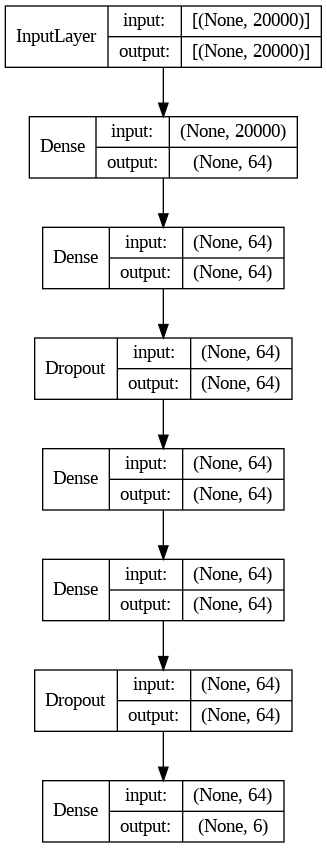

In [ ]:
from keras import utils

utils.plot_model(model, show_shapes=True, show_layer_names=False)

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=64, epochs=10, verbose=2)

Epoch 1/10
147/147 - 6s - loss: 1.0540 - accuracy: 0.6218 - val_loss: 0.5106 - val_accuracy: 0.8534 - 6s/epoch - 43ms/step
Epoch 2/10
147/147 - 1s - loss: 0.2385 - accuracy: 0.9318 - val_loss: 0.4306 - val_accuracy: 0.8669 - 914ms/epoch - 6ms/step
Epoch 3/10
147/147 - 1s - loss: 0.0501 - accuracy: 0.9878 - val_loss: 0.4904 - val_accuracy: 0.8755 - 929ms/epoch - 6ms/step
Epoch 4/10
147/147 - 1s - loss: 0.0150 - accuracy: 0.9966 - val_loss: 0.5789 - val_accuracy: 0.8688 - 800ms/epoch - 5ms/step
Epoch 5/10
147/147 - 1s - loss: 0.0066 - accuracy: 0.9988 - val_loss: 0.6154 - val_accuracy: 0.8764 - 940ms/epoch - 6ms/step
Epoch 6/10
147/147 - 1s - loss: 0.0039 - accuracy: 0.9989 - val_loss: 0.6583 - val_accuracy: 0.8736 - 936ms/epoch - 6ms/step
Epoch 7/10
147/147 - 1s - loss: 0.0045 - accuracy: 0.9995 - val_loss: 0.6806 - val_accuracy: 0.8678 - 862ms/epoch - 6ms/step
Epoch 8/10
147/147 - 1s - loss: 0.0014 - accuracy: 0.9997 - val_loss: 0.7253 - val_accuracy: 0.8716 - 833ms/epoch - 6ms/step
Ep

### Plot Loss and Accuracy

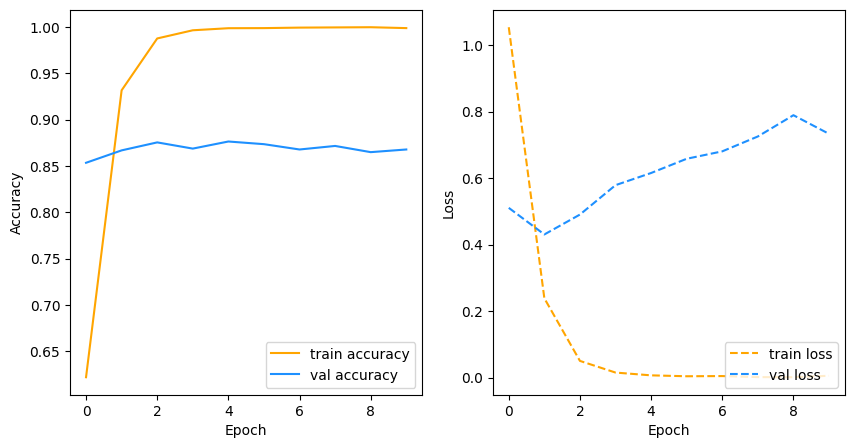

In [ ]:
import matplotlib.pyplot as plt

f = plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'],
         label='train accuracy',
         c='orange', ls='-')
plt.plot(history.history['val_accuracy'],
         label='val accuracy',
         c='dodgerblue', ls='-')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(history.history['loss'],
         label='train loss',
         c='orange', ls='--')
plt.plot(history.history['val_loss'],
         label='val loss',
         c='dodgerblue', ls='--')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')
plt.show()

### Predict $X_{test}$

In [ ]:
y_pred = model.predict(X_test)
print(y_pred.shape)

32/32 [==============================] - 2s 55ms/step
(1000, 6)


In [ ]:
y_pred = np.argmax(y_pred, axis=1)
print(y_pred.shape)

(1000,)


In [ ]:
sol = pd.DataFrame({'prediction': y_pred})
sol.head(10)

,prediction
0,2
1,2
2,2
3,1
4,5
5,4
6,3
7,4
8,4
9,3


In [ ]:
sol.to_csv('sol.csv', index=False)